<a href="https://colab.research.google.com/github/HARIS2003JULY/AI-ML-internship-tasks-/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2530610119.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


First 5 Rows:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.400513  72.460776  71.156674  71.409778  135480400
2020-01-03  71.696648  72.455966  71.472469  71.629153  146322800
2020-01-06  72.267921  72.306491  70.568495  70.819193  118387200
2020-01-07  71.928062  72.533103  71.708703  72.277586  108872000
2020-01-08  73.085106  73.386423  71.631552  71.631552  132079200

Model Performance:
MAE: 2.334064688260147
R2 Score: 0.9852342591756963


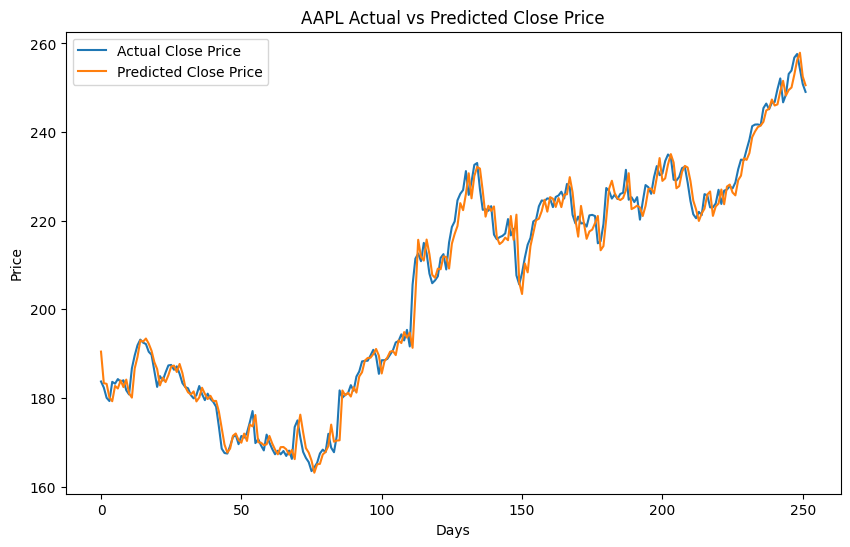


Predicted Next Day Closing Price: 250.56928702226227


In [2]:
# Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# -----------------------------
# 1️⃣ Select Stock (Example: Apple)
# -----------------------------
stock_symbol = "AAPL"   # You can change to TSLA, MSFT, etc.

# -----------------------------
# 2️⃣ Load Historical Data
# -----------------------------
data = yf.download(stock_symbol, start="2020-01-01", end="2025-01-01")

print("First 5 Rows:")
print(data.head())

# -----------------------------
# 3️⃣ Feature Selection
# -----------------------------
# Use Open, High, Low, Volume → Predict Close
data = data[['Open', 'High', 'Low', 'Volume', 'Close']]

# Shift Close to predict next day
data['Next_Close'] = data['Close'].shift(-1)

# Remove last row (NaN target)
data.dropna(inplace=True)

# -----------------------------
# 4️⃣ Define X and y
# -----------------------------
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Next_Close']

# -----------------------------
# 5️⃣ Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False   # shuffle False for time series
)

# -----------------------------
# 6️⃣ Train Model (Linear Regression)
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------
# 7️⃣ Predictions
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# 8️⃣ Evaluation
# -----------------------------
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("MAE:", mae)
print("R2 Score:", r2)

# -----------------------------
# 9️⃣ Plot Actual vs Predicted
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual Close Price")
plt.plot(y_pred, label="Predicted Close Price")
plt.title(f"{stock_symbol} Actual vs Predicted Close Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

# -----------------------------
# 🔟 Predict Next Day Price
# -----------------------------
latest_data = X.tail(1)
next_day_prediction = model.predict(latest_data)

print("\nPredicted Next Day Closing Price:", next_day_prediction[0])


In [1]:
pip install yfinance pandas numpy scikit-learn matplotlib seaborn
